## Jupyter Notebook for HW09_____________________________    Name_

This Jupyter Notebook is to be completed as written HW 09. Use text cells to answer questions and code sections to input, fit, and plot data.

If you share measurements and/or analysis with other students, please list them here.

Note: The data included as example here were collected by Prof Persans using different parameters from the ones you will use.

In [1]:
# Load the standard set of libraries for basic numerical computing.
import numpy as np
%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt  
from matplotlib.pyplot import figure

### Collect Data from PHET Simulation
</font>
<br>
Use the PHET app, “geometric-optics.en.jar” to answer the following questions. (You may have to enable Flash in your browser in order to run the app.)

Be sure to read all parts a-e to make sure you collect all the data you need. 

a) Find the focal length of the default lens (r=0.8, n=1.53) “experimentally” by measuring the object and image distances for at least ten measurable object distances. (Use the Ruler function in the app. By measurable, I mean that both object and image distances are shorter than the ruler.) 


Enter your ten measurement pairs into the Excel spreadsheet supplied in the homework folder.



You will use pandas to read your spreadsheet!

In [9]:
import pandas as pd
datafile = pd.read_csv('C:/Users/ppers/Documents/Documents/aa_Classes/Jupyter Quantum Notebooks/PHYS1250/ImagingHomework09.csv', sep=',') #put forward slashes when specifying the path
measobject = datafile['object'] #the measured object distance in mm
measimage = datafile['image'] # the measured image distance
invobject=1/measobject
invimage=1/measimage
totaldist=measobject+measimage


In [6]:
# Heres your data!
datafile.head()

,object,image
0,200,80
1,166,86
2,134,100
3,110,120
4,120,110


---

<font color = 'slateblue'>

### Orthogonal Distance Regression
    
</font>
<br>
This is the fitting tool you will use in PHYS 2350. Most of what is below was adapted from the supplement to Lab 7 written by Zuzanna Jedlinska. 

You are fitting 1/i as a function of 1/o, so the 1/o=0 intercept is 1/f. This has the advantage over determining 1/f for each 1/o and 1/i pair in that it fits all of the data at once and produces the uncertainty in the fit parameters. 

The key data for you are the beta fit parameters. B[1] is the y intercept at x=0 (which in this case is 1/f), and B[0] is the slope (which in this case we expect to be 1). The Beta standard error is the uncertainty in the fit parameters. 

The uncertainty in f is $\sigma(f) \approx df/d(1/f) * \sigma(1/f)=\sigma(1/f)/(1/f)^2 = f^2*\sigma(1/f)$. 

In [17]:
import scipy.odr.odrpack as odrpack

#choose the function you expect you would get if you interpolated through all your datapoints
#ODR will determine your B parameters - it will return an array - Beta - with these parameters
def f(B, x):
    return B[0]*x + B[1]
linear = odrpack.Model(f) #the function f is indeed linear - so inform ODR about it and pack it as a model
#other models available on the doc page

#pack the data
data = odrpack.RealData(invobject, invimage) #sx,sy are the standard deviations that will be used to generate weights - passed by name

odrpacked = odrpack.ODR(data, linear, beta0=[1., 2.]) #the algorithm needs to start somewhere so pass it some initial B array
fitout = odrpacked.run() #run ODR
fitout.pprint() #analyze information about the fit
coeffs = fitout.beta
focalfit=1/coeffs[1]
print(focalfit)

Beta: [-1.03524534  0.01775049]
Beta Std Error: [0.01992792 0.00015104]
Beta Covariance: [[ 1.58707985e+05 -1.17990594e+03]
 [-1.17990594e+03  9.11723576e+00]]
Residual Variance: 2.50221859643e-09
Inverse Condition #: 0.00146625504914
Reason(s) for Halting:
  Sum of squares convergence
56.33647594149303


In [12]:
y2 = f(coeffs, invobject) #plot function using given coefficients

array([-1.03524534,  0.01775049])

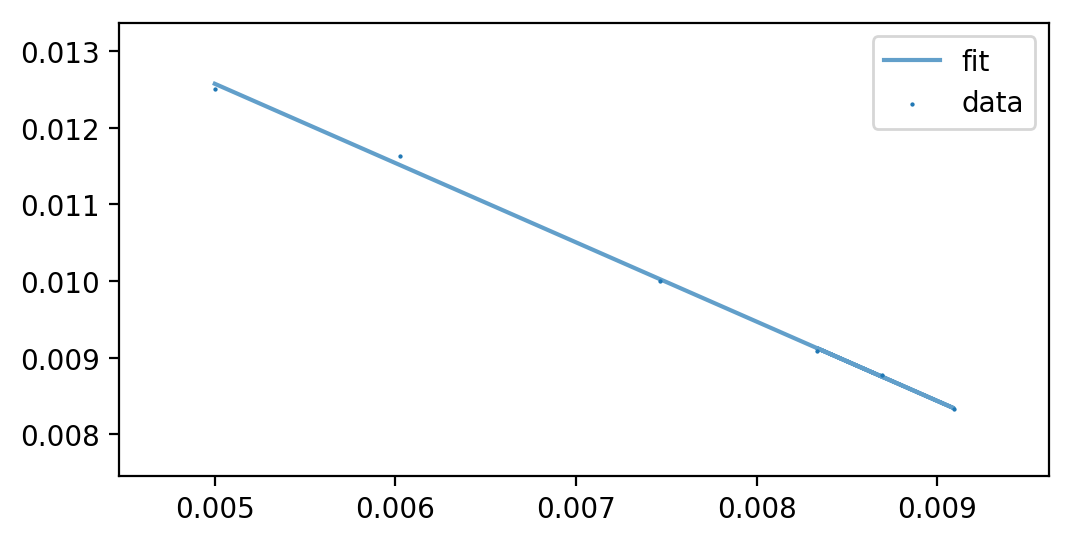

In [16]:
figure(num=None, figsize=(6, 3), dpi=200, facecolor='w', edgecolor='k')
plt.scatter(invobject,invimage, s=0.3, label = 'data') #Plot data as points.
plt.plot(invobject,y2,alpha=0.7, label='fit') #Plot the fit.
plt.legend()
plt.show()

b) Describe any systematic differences of the data from the fit. If there are any discuss what the origin might be.

c) Test whether the focal length that you measured is consistent with theory by applying the Lensmaker’s Formula. Compare your calculation with your measurement.

d) For what object distance is the total distance from object to real image the smallest? (Estimate this by plotting total distance against object distance.) How does this number compare with the focal length.


e) Use the relationship 1/o+1/i=1/f and some basic calculus to show that o=2f and o+i=4f when o+i=minimum.


f) Measure the object distance for which the virtual image distance is twice the object distance. How does this measurement compare with a direct calculation using the focal length from the Lensmaker’s Formula?


Read about the parameters:

https://docs.scipy.org/doc/scipy/reference/odr.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.RealData.html#scipy.odr.RealData

https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.Data.html#scipy.odr.Data